# Amazon Fine Food Reviews Analysis
> Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews 

> EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/

> Reference : https://www.kaggle.com/jitendras/t-sne-amazon-fine-food-reviews-data-set  
              https://github.com/Prakhar-FF13/Amazon-Fine-Food-Reviews/blob/master/Amazon%20Fine%20Food%20Reviews%20TSNE.ipynb

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

* Number of reviews: 568,454
* Number of users: 256,059
* Number of products: 74,258
* Timespan: Oct 1999 - Oct 2012
* Number of Attributes/Columns in data: 10

### Attribute Information:

* Id
* ProductId - unique identifier for the product
* UserId - unqiue identifier for the user
* ProfileName
* HelpfulnessNumerator - number of users who found the review helpful
* HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
* Score - rating between 1 and 5
* Time - timestamp for the review
* Summary - brief summary of the review
* Text - text of the review


In [2]:
import pandas as pd
csv = pd.read_csv("Reviews.csv")
csv.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
csv['Id'].size

568454

In [4]:
import sqlite3
import pandas as pd

In [5]:
con = sqlite3.connect("database.sqlite")
df = pd.read_sql_query(""" SELECT * FROM Reviews
WHERE Score != 3
""", con)
print(df.shape)
df.head(2)

(525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [6]:
def partition(x):
    if x> 3:
        return "Positive"
    return "Negative"

actual_score = df["Score"]
positive_Negative = actual_score.map(partition)
df["Score"] = positive_Negative
print(df.shape)
df.head()



#or a single sine of code
#df["Score"] = df.Score.apply(lambda x:"Positive" if x>3 else "Negative")
#df["Score"] = positive_Negative
#df.head()'''

(525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
display = pd.read_sql_query("""SELECT * FROM Reviews
                               WHERE Score !=3 AND ProfileName = "Geetha Krishnan" 
                               ORDER BY ProductId """,con)
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [8]:
#Sorting data according to ProductId in ascending order
#refer:  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

sorted_df = df.sort_values("ProductId", axis=0, ascending = True)

In [9]:
#Deduplication of entries  || remove duplicate data's
Perfect_df = sorted_df.drop_duplicates(subset={"UserId", "ProfileName","Score","Time","Text"}, keep="first", inplace= False)

In [10]:
df.shape

(525814, 10)

In [11]:
Perfect_df.shape

(364177, 10)

In [12]:
red_percentage  =((Perfect_df['Id'].size*1.0)/(df['Id'].size*1.0))*100 
red_percentage

69.25966216190515

In [13]:
print(f"{red_percentage} % duplicate reduction from the original data!!")

69.25966216190515 % duplicate reduction from the original data!!


In [14]:
Perfect_df=Perfect_df[Perfect_df.HelpfulnessNumerator<= Perfect_df.HelpfulnessDenominator]

In [15]:
Perfect_df['Id'].size

364175

In [16]:
#How many positive and negative reviews are present in our dataset?
Perfect_df['Score'].value_counts()

Positive    307063
Negative     57112
Name: Score, dtype: int64

In [17]:
#Picking out a Sample of +ve and -ve
positive_points = Perfect_df[Perfect_df['Score'] == 'Positive']
positive_points= positive_points[:2000]
negative_points = Perfect_df[Perfect_df['Score'] == 'Negative']
negative_points =negative_points[:2000]

In [18]:
positive_points = positive_points.append(negative_points, ignore_index=True)
from sklearn.utils import shuffle
positive_points = shuffle(positive_points)

In [19]:
positive_points['Score'].value_counts()

Negative    2000
Positive    2000
Name: Score, dtype: int64

In [20]:
Perfect_df = positive_points
Perfect_df.shape

(4000, 10)

# Text Preprocessing-->

In [103]:
# printing some random reviews
#sent_0 = final['Text'].values[0]
text_0 = Perfect_df["Text"].values[0]
print(text_0)

print("=="*25)

text_1000 =Perfect_df["Text"].values[1000]
print(text_1)
print("=="*25)




ordered canisters party needed certain amount said pieces per canister ordered right amount however first canister short three second short two third short five total short not pleased yes candies good say pieces makes sure put pieces canister ripoff
My 20-month-old Toy Fox Terrier mix has been eating Canidae since I adopted her and changed her over from Science Diet, so I don't have an amazing transformation story.<br /><br />However,<br />1. She's only been sick twice to speak of. No unexpected need to go outside NOW or accidents in the house because of illness. What comes out of her is as predictable as the sunrise, albeit somewhat less pleasant overall.<br /><br />2. This 12-pound, high-energy dog eats just under 1 cup a day. A 40-pound bag lasts me about 6 MONTHS, which calculates as less than $7/month for food. Canidae may cost more than better-known brands, but it's a bargain for the improved nutrition and related benefits (see 1 and 3).<br /><br />3. It never occurred to me tha

In [22]:
import re

In [23]:
#remove urls from text python: https://stackoverflow.com/a/40823105/4084039
# Using "r" because it make all the raw string
#https://stackoverflow.com/questions/2241600/python-regex-r-prefix
#sent_0 = re.sub(r"http\S+", "", sent_0)
print(f"before: \n{text_0}")
text_0 = re.sub(r"(http|https):\S+","", text_0)
print(f"after: \n {text_0}")

before: 
I ordered the 42oz. canisters for a party.  We needed a certain amount so when they said 100 pieces per canister, I ordered just the right amount...however, the first canister was short by three...the second short by two, the third short by five...a total of 10 short.  Why??? Not pleased.  Yes the candies are good but if you say 100 pieces, makes sure you put 100 pieces in the canister.  A ripoff...
after: 
 I ordered the 42oz. canisters for a party.  We needed a certain amount so when they said 100 pieces per canister, I ordered just the right amount...however, the first canister was short by three...the second short by two, the third short by five...a total of 10 short.  Why??? Not pleased.  Yes the candies are good but if you say 100 pieces, makes sure you put 100 pieces in the canister.  A ripoff...


In [24]:
print(text_0)
from bs4 import BeautifulSoup
soup = BeautifulSoup(text_0,"lxml")
text_0 = soup.get_text()
print(text_0)


I ordered the 42oz. canisters for a party.  We needed a certain amount so when they said 100 pieces per canister, I ordered just the right amount...however, the first canister was short by three...the second short by two, the third short by five...a total of 10 short.  Why??? Not pleased.  Yes the candies are good but if you say 100 pieces, makes sure you put 100 pieces in the canister.  A ripoff...
I ordered the 42oz. canisters for a party.  We needed a certain amount so when they said 100 pieces per canister, I ordered just the right amount...however, the first canister was short by three...the second short by two, the third short by five...a total of 10 short.  Why??? Not pleased.  Yes the candies are good but if you say 100 pieces, makes sure you put 100 pieces in the canister.  A ripoff...


In [25]:
#Expanding English language contractions in Python
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [26]:
text_0 = decontracted(text_0)
print(text_0)

I ordered the 42oz. canisters for a party.  We needed a certain amount so when they said 100 pieces per canister, I ordered just the right amount...however, the first canister was short by three...the second short by two, the third short by five...a total of 10 short.  Why??? Not pleased.  Yes the candies are good but if you say 100 pieces, makes sure you put 100 pieces in the canister.  A ripoff...


In [27]:
#Python regex to remove all words which contains number
text_0= re.sub(r"\S*\d\S*","",text_0)
text_0

'I ordered the  canisters for a party.  We needed a certain amount so when they said  pieces per canister, I ordered just the right amount...however, the first canister was short by three...the second short by two, the third short by five...a total of  short.  Why??? Not pleased.  Yes the candies are good but if you say  pieces, makes sure you put  pieces in the canister.  A ripoff...'

In [28]:
text_0= re.sub(r"[^a-zA-Z1-9]+"," ",text_0)
text_0

'I ordered the canisters for a party We needed a certain amount so when they said pieces per canister I ordered just the right amount however the first canister was short by three the second short by two the third short by five a total of short Why Not pleased Yes the candies are good but if you say pieces makes sure you put pieces in the canister A ripoff '

In [29]:
#added-------> br
#deleted ------> no, nor, not

stopword = set(['br','under', 'having', 'can', 'its', 'any', 'do', "she's", 'then', 'hasn', "that'll", 'on', 'both', "doesn't", 's',\
            'yourself', 'than', 'weren', 'haven', 'about', 'only', 'for', 'is', 'ma', 'isn', 'above', 'yourselves', "shan't",\
            'some', "needn't", 'how', 'where', "you're", 'by', 'if', "hadn't", "wouldn't", "don't", 'why', 'be', 'through',\
            "won't", 'd', 'out', 'again', 'him', 'a', 'are', 'while', 'over', 'o', 'me', 'yours', "you'd", 'they',\
            'those', "mustn't", "mightn't", "weren't", 'into', 'your', 'off', 'here', 'don', 'myself', 'we', 'theirs', 'and',\
            'y', 'himself', 'at', 'shouldn', 've', 'before', 'after', "it's", 'an', 'these', 'with', 'own', "didn't", 'whom',\
            "couldn't", "should've", 'now', 'ourselves', "haven't", "you'll", 'in', 'few', 'you', 'he', 'ain', 'mustn',\
            "aren't", 'she', 'ours', 'against', 'when', 'being', 'won', 'as', 'his', 'should', "wasn't",\
            'more', 'from', 'but', 'her', 'hers', 'further', 'down', 'of', 'all', 'their', 'i', "hasn't", 'so', 'wouldn',\
            'm', 'themselves', 'below', 'each', 'am', 'have', 'that', 'has', 'between', 'or', 'mightn', 'there', 'them',\
            'did', 'the', 'up', 't', 'itself', 'such', 'this', 'to', 'who', "you've", 'had', 'were', 'been', \
            'couldn', 'most', 'does', 'herself', 'doesn', 'wasn', 'didn', 'was', 'doing', 'my', 'shan', 'during',\
            'same', 'aren', "isn't", 'until', 'what', 'our', 'too', 'other', 'it', 'because', 'once', "shouldn't", \
            're', 'will', 'which', 'very', 'just', 'needn', 'hadn', 'll'])

In [30]:
import tqdm

preprocessed_reviews = []
for i in tqdm.tqdm(Perfect_df["Text"].values):
    i = re.sub(r"http:\S"," ",i)
    i = BeautifulSoup(i,"lxml").get_text()
    i = decontracted(i)
    i = re.sub(r"\S*\d\S*", " ", i)
    i = re.sub(r"[^A-Za-z1-9]+"," ",i)
    i = " ".join(j.lower() for j in i.split() if j.lower() not in stopword)
    preprocessed_reviews.append(i)
    

    


100%|████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:02<00:00, 1346.68it/s]


In [31]:
Perfect_df["Text"] = preprocessed_reviews

In [32]:
preprocessed_reviews[0]

'ordered canisters party needed certain amount said pieces per canister ordered right amount however first canister short three second short two third short five total short not pleased yes candies good say pieces makes sure put pieces canister ripoff'

# Preprocess Summary

In [99]:
Perfect_df["Summary"].values[1]

'mess success'

In [100]:
preprocessed_summary = []

for i in tqdm.tqdm(Perfect_df["Summary"].values):
    i = re.sub(r"(http|https):\S"," ",i)
    i = BeautifulSoup(i,"lxml").get_text()
    i = decontracted(i)
    i = re.sub(r"\S*\d\S*", " ", i)
    i = re.sub(r"[^A-Za-z1-9]+"," ",i).strip()
    i = " ".join(j.lower() for j in i.split() if j.lower() not in stopword)
    preprocessed_summary.append(i)
    

100%|████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:02<00:00, 1688.36it/s]


In [101]:
preprocessed_summary[1]

'mess success'

In [102]:
Perfect_df["Summary"] = preprocessed_summary

# BAG OF WORDS

### A)Review text, preprocessed one converted into vectors using (BOW)

In [37]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#BOW of Text:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

final_counts = count_vect.fit_transform(Perfect_df["Text"].values)
print(type(final_counts))
print("=="*25)
print(final_counts.get_shape())


<class 'scipy.sparse.csr.csr_matrix'>
(4000, 14869)


In [38]:
#bow_dense = final_counts.todense()
bow_dense = pd.SparseDataFrame(final_counts)

In [39]:
print(type(final_counts))

<class 'scipy.sparse.csr.csr_matrix'>


In [40]:
#reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
bow_dense = bow_dense.fillna(0)

In [41]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(bow_dense.values)

In [54]:
import seaborn as sbn
import matplotlib.pyplot as plt

In [50]:
from sklearn.manifold import TSNE
import seaborn as sbn
labels = Perfect_df['Score']
data = standardized_data

model = TSNE(n_components = 2, random_state = 0, perplexity= 50)
Tsne_data = model.fit_transform(data)
Tsne_data.shape


(4000, 2)

In [52]:
Tsne_data = np.vstack((Tsne_data.T, labels)).T
Tsne_data.shape

(4000, 3)

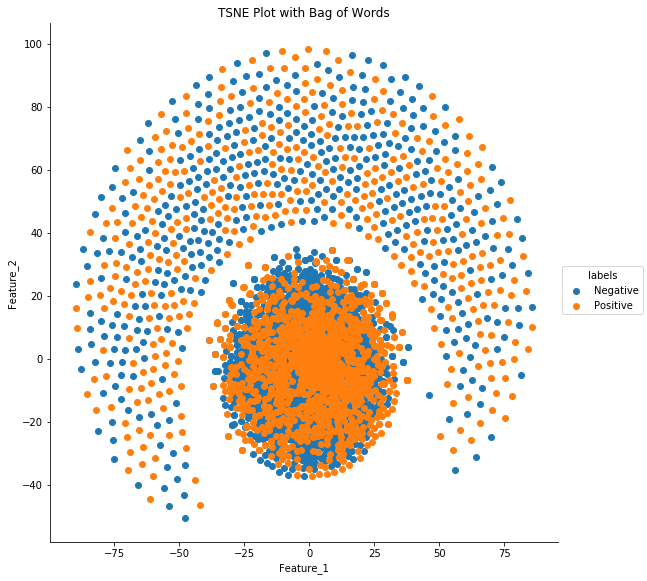

In [56]:
tsne_df = pd.DataFrame(data= Tsne_data, columns= ("Feature_1", "Feature_2","labels"))
sbn.FacetGrid(data= tsne_df, hue= "labels", size= 8)\
.map(plt.scatter, "Feature_1", "Feature_2")\
.add_legend()
plt.title("TSNE Plot with Bag of Words")
plt.show()

In [57]:
#BOW of Summary
bow_sum =count_vect.fit_transform(preprocessed_summary) 
print(count_vect.get_feature_names()[:10])

['aaaaaagggghhhh', 'abby', 'abel', 'abhor', 'absolute', 'absolutely', 'absolutly', 'accidents', 'ach', 'acid']


# Bi-Grams and n-Grams

In [266]:
#Bi-Gram in Text
count_vect_gram = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=500)
count_biGram = count_vect_gram.fit_transform(preprocessed_reviews)
print(count_vect_gram.get_feature_names()[:20])

['aa', 'aa sumatra', 'aahhhs', 'aahhhs get', 'aback', 'aback brand', 'abandon', 'abates', 'abates steeping', 'abbott', 'abbott laboratories', 'abby', 'abdominal', 'abdominal cramping', 'abiding', 'abiding childhood', 'ability', 'ability able', 'ability adjust', 'ability eat']


In [267]:
#Bi-Gram in Summary
count_vect_summary = CountVectorizer(ngram_range= (1,2),  min_df=10, max_features=500)
count_summary = count_vect_summary.fit_transform(preprocessed_summary)
print(count_vect_summary.get_feature_names()[:10])

['able', 'able eat', 'able get', 'absolute', 'absolute dream', 'absolute recommend', 'absolutely', 'absolutely awesome', 'absolutely best', 'absolutely delicious']


# TF-IDF

In [58]:
#TF-IDF for Text
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(ngram_range= (1,2), min_df=10, max_features=500)
tfidf_Text = tfidf_vector.fit_transform(Perfect_df["Text"].values)
type(tfidf_Text)

scipy.sparse.csr.csr_matrix

In [59]:
tfidf_Text.get_shape()

(4000, 500)

In [61]:
tfidf_dense = pd.SparseDataFrame(tfidf_Text)
tfidf_dense = tfidf_dense.fillna(0)

In [62]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(tfidf_dense.values)

In [63]:
data = standardized_data

model = TSNE(n_components = 2, random_state = 0, perplexity= 50)
Tsne_data = model.fit_transform(data)
Tsne_data.shape

(4000, 2)

In [64]:
Tsne_data = np.vstack((Tsne_data.T, labels)).T
Tsne_data.shape

(4000, 3)

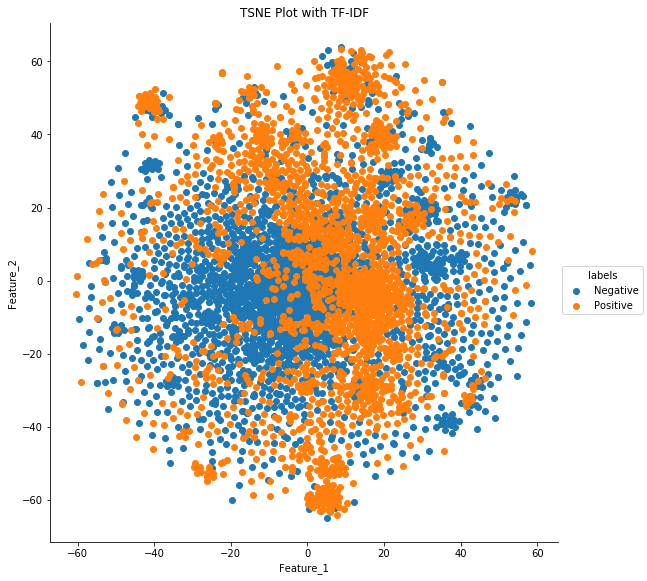

In [77]:
tsne_df = pd.DataFrame(data= Tsne_data, columns= ("Feature_1", "Feature_2","labels"))
sbn.FacetGrid(data= tsne_df, hue= "labels", size= 8)\
.map(plt.scatter, "Feature_1", "Feature_2")\
.add_legend()
plt.title("TSNE Plot with TF-IDF")
plt.show()

In [67]:
#TF-IDF for Summary
tfidf_vector_summary = TfidfVectorizer(ngram_range= (1,2))
tfidf_summary = tfidf_vector_summary.fit_transform(preprocessed_summary)
print(tfidf_vector_summary.get_feature_names()[:20])


['aaaaaagggghhhh', 'aaaaaagggghhhh awful', 'abby', 'abby zoe', 'abel', 'abhor', 'absolute', 'absolute best', 'absolute fraud', 'absolute must', 'absolute rubbish', 'absolute worst', 'absolutely', 'absolutely awful', 'absolutely fantastic', 'absolutely great', 'absolutely horrible', 'absolutely vile', 'absolutly', 'absolutly godsend']


# Word2Vec

In [68]:
from gensim.models import Word2Vec as w2v
'''from gensim.models import KeyedVectors

from gensim.models import Word2Vec
from gensim.models import KeyedVectors'''

C:\Users\Shritam\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


'from gensim.models import KeyedVectors\n\nfrom gensim.models import Word2Vec\nfrom gensim.models import KeyedVectors'

In [69]:
#There are tow ways to train the model 1) Google trained model  2)Train your own Word2Vec model using your own text corpus

list_of_sentance = []
for i in preprocessed_reviews:
    list_of_sentance.append(i.split())

In [70]:
list_of_sentance[10]

['using',
 'canidae',
 'years',
 'along',
 'nuvet',
 'vitamins',
 'wonderful',
 'product',
 'ingredients',
 'change',
 'not',
 'noticed',
 'sort',
 'change',
 'siberian',
 'huskies',
 'ever',
 'still',
 'high',
 'energy',
 'lush',
 'coats',
 'white',
 'teeth',
 'great',
 'done',
 'density',
 'happy',
 'product',
 'no',
 'problems']

In [71]:
w2v_model = w2v(list_of_sentance,min_count =5, size = 50, workers = 4)


In [72]:
print(w2v_model.wv.most_similar("great"))

[('dried', 0.996928334236145), ('absolutely', 0.9959860444068909), ('give', 0.9959092736244202), ('training', 0.9956940412521362), ('favorite', 0.9950920343399048), ('zuke', 0.9950249195098877), ('lamb', 0.9937080144882202), ('mix', 0.9935868382453918), ('puppy', 0.9935449361801147), ('diamond', 0.9934192895889282)]


In [73]:
print(w2v_model.wv.most_similar("like"))

[('flavor', 0.9935302734375), ('taste', 0.9920886158943176), ('good', 0.9907283782958984), ('not', 0.9823766946792603), ('much', 0.9818328619003296), ('buy', 0.9784494638442993), ('better', 0.975265622138977), ('really', 0.9748904705047607), ('tastes', 0.9676767587661743), ('know', 0.9628571271896362)]


In [74]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  4275
sample words  ['ordered', 'party', 'needed', 'certain', 'amount', 'said', 'pieces', 'per', 'canister', 'right', 'however', 'first', 'short', 'three', 'second', 'two', 'third', 'five', 'total', 'not', 'pleased', 'yes', 'candies', 'good', 'say', 'makes', 'sure', 'put', 'ripoff', 'toy', 'terrier', 'mix', 'eating', 'canidae', 'since', 'adopted', 'changed', 'science', 'diet', 'amazing', 'sick', 'twice', 'speak', 'no', 'need', 'go', 'outside', 'house', 'illness', 'comes']


# Converting Sentance into vectors using weighted Avg W2V, TFIDF-W2V


### Avg W2v

In [75]:
import numpy as np
sent_vector =[]
for sent in tqdm.tqdm(list_of_sentance):
    sent_vec = np.zeros(50)
    cnt_words = 0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec +=vec
            cnt_words +=1
        except:
            pass
    vector= sent_vec / cnt_words
    sent_vector.append(vector)
print(len(sent_vector))
print(len(sent_vector[0]))

100%|████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:01<00:00, 2030.48it/s]


4000
50


In [81]:
sent_vector[100]

array([ 0.10999069,  0.32332698, -0.40799226,  0.61076261,  0.20271612,
       -0.36239382, -0.3025619 ,  0.1731796 , -0.31565515,  0.4070702 ,
       -0.14536246, -0.09677059, -0.42002174, -0.60340196, -0.09794602,
        0.40797688,  0.02649113, -0.09505288,  0.62757445, -0.23226676,
       -0.26137582, -0.00374601,  0.00496849, -0.37867919, -0.11153359,
       -0.24714024,  0.37000666, -0.27756736,  0.36132406, -0.16028671,
        0.12387626,  0.47899095,  0.09450209, -0.01644712,  0.13645176,
        0.05879234,  0.04803992, -1.13106454, -0.08712278, -0.54138817,
        0.4069865 ,  0.08186591,  0.36994943,  0.05701792, -0.50657865,
        0.33364391, -0.1598423 , -0.02339325,  0.01323675, -0.46717701])

In [89]:
tsne_avg_data =TSNE().fit_transform(sent_vector)

In [90]:
#Data Massaging
Tsne_data = np.vstack((tsne_avg_data.T, labels)).T
Tsne_data.shape

(4000, 3)

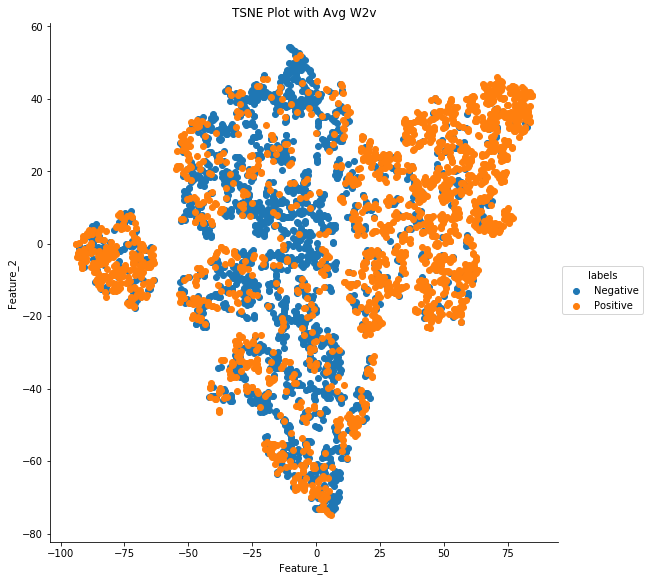

In [91]:
tsne_df = pd.DataFrame(data= Tsne_data, columns= ("Feature_1", "Feature_2","labels"))
sbn.FacetGrid(data= tsne_df, hue= "labels", size= 8)\
.map(plt.scatter, "Feature_1", "Feature_2")\
.add_legend()
plt.title("TSNE Plot with Avg W2v")
plt.show()

### TFIDF-W2V

In [93]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(preprocessed_reviews)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [94]:
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm.tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:46<00:00, 86.03it/s]


In [95]:
tsne_avg_tfidf_data =TSNE().fit_transform(tfidf_sent_vectors)

In [96]:
Tsne_data = np.vstack((tsne_avg_tfidf_data .T, labels)).T
Tsne_data.shape

(4000, 3)

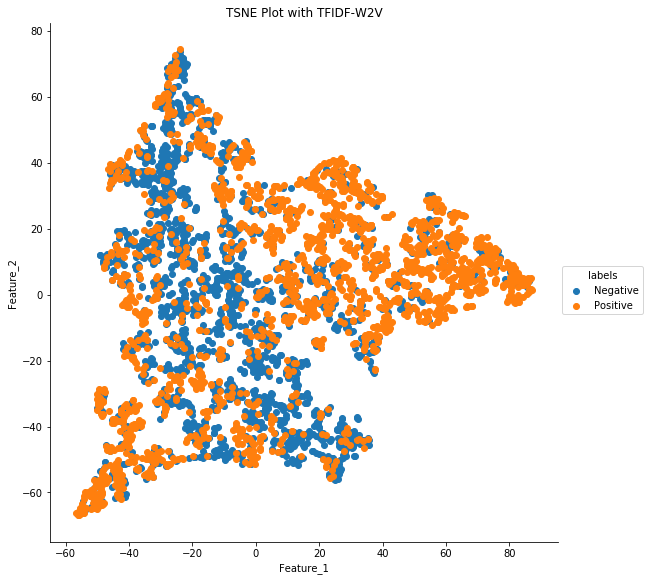

In [98]:
tsne_df = pd.DataFrame(data= Tsne_data, columns= ("Feature_1", "Feature_2","labels"))
sbn.FacetGrid(data= tsne_df, hue= "labels", size= 8)\
.map(plt.scatter, "Feature_1", "Feature_2")\
.add_legend()
plt.title("TSNE Plot with TFIDF-W2V")
plt.show()









# Conclusions

* Even though t-SNE is very powerful technique to visualize high dimension data but still it's unable to separate the class labels in our dataset.
* It accepts dense matrix to execute on it but computationally it is very expensive for much higher dimensional data as in our case.
* There were completely overlapping of class labels on each other that means t-SNE failed to separate the class labels.
* Changing parameters and getting stable t-SNE model is very important but even after trying out many combinations of parameters. It is found out that it doesn't help in our case of Amazon Fine Food Reviews dataset and some of the parameter adjustment are shown here also